## Detección de fraudes con tarjetas de credito

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [1]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importa y organiza el dataset

In [3]:
dataframe = pd.read_csv('C:\\Users\\Zene\\Documents\\Ejemplos\\creditcard.csv', error_bad_lines=False, warn_bad_lines=True)

print(dataframe.head(10))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

### Limpia los datos

In [4]:
# Paso 1: Cargar el DataFrame desde un archivo CSV
ruta_archivo = 'C:\\Users\\Zene\\Documents\\Ejemplos\\creditcard.csv'
data = pd.read_csv(ruta_archivo)

# Verificar que el DataFrame se ha cargado correctamente
print(data.head())

# Paso 2: Contar los valores nulos en cada columna
nulos_booleanos = data.isnull()
conteo_nulos = nulos_booleanos.sum()

# Mostrar el conteo de valores nulos en cada columna
print(conteo_nulos)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:
# Identificar columnas con todos ceros
columns_with_zeros = [col for col in data.columns if (data[col] == 0).all()]
print(f"Columnas con todos ceros: {columns_with_zeros}")



Columnas con todos ceros: []


In [9]:
# Eliminar columnas con todos ceros
data_cleaned = data.drop(columns=columns_with_zeros)

# Verificar el DataFrame limpio
print(data_cleaned.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [11]:
# Eliminar columnas con todos ceros
data_cleaned = data.drop(columns=columns_with_zeros)

# Verificar el DataFrame limpio
print(data_cleaned.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [13]:
# Crear un DataFrame booleano donde 'True' indica una fila duplicada
duplicados_booleanos = data.duplicated()


In [17]:
# Todo en una sola línea de código
conteo_duplicados = data.duplicated().sum()
print(f"Cantidad de filas duplicadas: {conteo_duplicados}")


Cantidad de filas duplicadas: 1081


In [19]:
# Eliminar filas duplicadas
data_limpio = data.drop_duplicates()

# Mostrar las primeras filas del DataFrame limpio
print(data_limpio.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [21]:
# Supongamos que `data` es tu dataset y `Class` es la columna que indica transacciones fraudulentas
num_fraudulentas = data[data['Class'] == 1].shape[0]
num_total = data.shape[0]
porcentaje_fraudulentas = (num_fraudulentas / num_total) * 100

print(f"Porcentaje de transacciones fraudulentas: {porcentaje_fraudulentas}%")


Porcentaje de transacciones fraudulentas: 0.1727485630620034%


In [23]:
# Supongamos que `data` es tu dataset y `Class` es la columna que indica transacciones fraudulentas
transacciones_fraudulentas = data[data['Class'] == 1]
importe_medio_fraudulentas = transacciones_fraudulentas['Amount'].mean()

print(f"Importe medio de las transacciones fraudulentas: {importe_medio_fraudulentas}")


Importe medio de las transacciones fraudulentas: 122.21132113821139


### Visualiza los datos

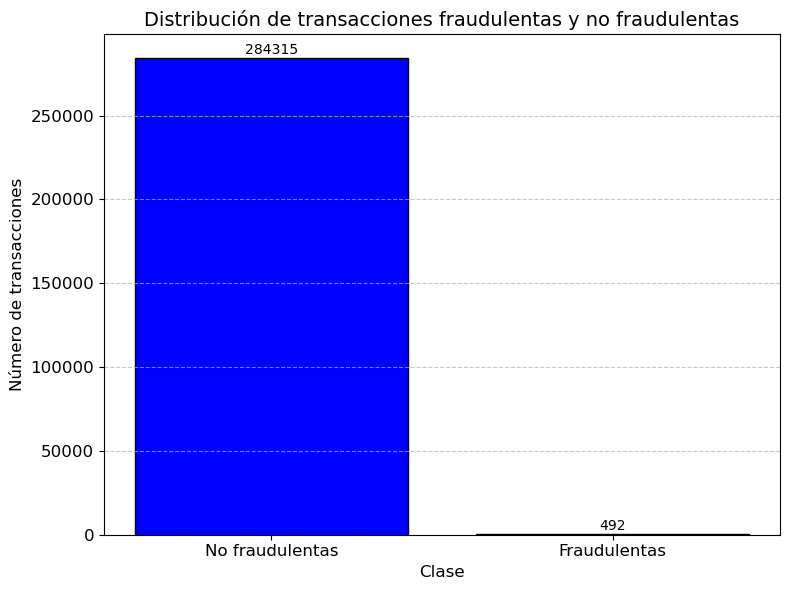

In [94]:

# Contar el número de transacciones fraudulentas y no fraudulentas
conteo_fraudulentas = data['Class'].value_counts()

# Crear el gráfico de barras mejorado
plt.figure(figsize=(8, 6))
barra = plt.bar(conteo_fraudulentas.index, conteo_fraudulentas.values, color=['blue', 'orange'], edgecolor='black')

# Añadir etiquetas de texto a cada barra
for barra_i in barra:
    yval = barra_i.get_height()
    plt.text(barra_i.get_x() + barra_i.get_width()/2, yval + 500, int(yval), ha='center', va='bottom', fontsize=10)

plt.xlabel('Clase', fontsize=12)
plt.ylabel('Número de transacciones', fontsize=12)
plt.title('Distribución de transacciones fraudulentas y no fraudulentas', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No fraudulentas', 'Fraudulentas'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


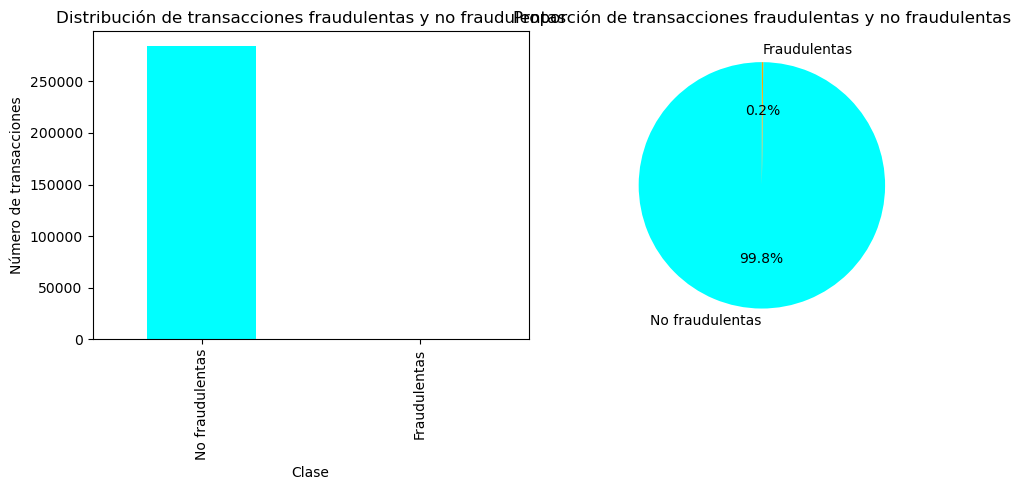

In [108]:
# Supongamos que `data` es tu dataset y `Class` es la columna que indica transacciones fraudulentas
# Contar el número de transacciones fraudulentas y no fraudulentas
conteo_fraudulentas = data['Class'].value_counts()

# Crear el gráfico de barras detallado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
conteo_fraudulentas.plot(kind='bar', color=['cyan', 'yellow'])
plt.xlabel('Clase')
plt.ylabel('Número de transacciones')
plt.title('Distribución de transacciones fraudulentas y no fraudulentas')
plt.xticks(ticks=[0, 1], labels=['No fraudulentas', 'Fraudulentas'])

# Crear el gráfico de sectores (pie chart)
plt.subplot(1, 2, 2)
conteo_fraudulentas.plot(kind='pie', labels=['No fraudulentas', 'Fraudulentas'], colors=['cyan', 'orange'], autopct='%1.1f%%', startangle=90)
plt.title('Proporción de transacciones fraudulentas y no fraudulentas')
plt.ylabel('')

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()


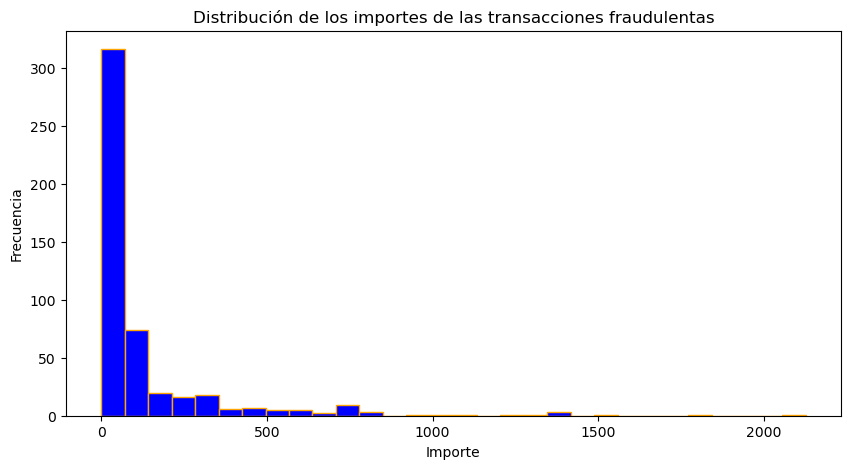

In [50]:
# Supongamos que `data` es tu dataset y `Class` es la columna que indica transacciones fraudulentas
# Filtrar las transacciones fraudulentas
transacciones_fraudulentas = data[data['Class'] == 1]

# Crear el histograma de los importes de las transacciones fraudulentas
plt.figure(figsize=(10, 5))
plt.hist(transacciones_fraudulentas['Amount'], bins=30, color='blue', edgecolor='orange')
plt.xlabel('Importe')
plt.ylabel('Frecuencia')
plt.title('Distribución de los importes de las transacciones fraudulentas')
plt.show()


### Desarrollo y evaluación de modelos

#### Separa del dataset 
Divide los datos en un 80% para entrenamiento y un 20% para evaluación

In [44]:
from sklearn.model_selection import train_test_split

# Supongamos que `data` es tu dataset y `Class` es la columna que indica transacciones fraudulentas
# Crear el DataFrame X (todas las columnas excepto "Class") y la Serie y (solamente "Class")
X = data.drop(columns=['Class'])
y = data['Class']

# Dividir los datos en grupos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del grupo de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del grupo de evaluación: {X_test.shape[0]} muestras")


Tamaño del grupo de entrenamiento: 227845 muestras
Tamaño del grupo de evaluación: 56962 muestras


### Crea y evalúa los modelos

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Supongamos que `data` es tu dataset y `Class` es la columna que indica transacciones fraudulentas
# Crear el DataFrame X (todas las columnas excepto "Class") y la Serie y (solamente "Class")
X = data.drop(columns=['Class'])
y = data['Class']

# Dividir los datos en grupos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia de RandomForestClassifier
modelo = RandomForestClassifier(max_depth=150, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones sobre los datos de evaluación
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
reporte_clasificacion = classification_report(y_test, y_pred)
exactitud = accuracy_score(y_test, y_pred) * 100

print("Resumen del rendimiento del modelo:")
print(reporte_clasificacion)
print(f"Exactitud del modelo: {exactitud:.2f}%")


Resumen del rendimiento del modelo:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Exactitud del modelo: 99.96%


### Métricas clave:
- **Precision (Precisión)**: Indica qué proporción de las transacciones predichas como fraudulentas (clase 1) son realmente fraudulentas.
- **Recall (Exhaustividad)**: Muestra qué proporción de las transacciones fraudulentas reales fueron correctamente identificadas por el modelo.
- **F1-score**: Es la media armónica de la precisión y la exhaustividad. Es una buena medida de rendimiento cuando necesitas balancear ambas métricas.
- **Support**: Muestra el número total de instancias en cada clase.

### Interpretación de las métricas:
- **Clase 0 (No fraudulentas)**:
  - **Precision**: 1.00 (100%). El modelo predice correctamente todas las transacciones no fraudulentas.
  - **Recall**: 1.00 (100%). El modelo identifica correctamente todas las transacciones no fraudulentas.
  - **F1-score**: 1.00. El modelo tiene un rendimiento perfecto para esta clase.

- **Clase 1 (Fraudulentas)**:
  - **Precision**: 0.97 (97%). El 97% de las transacciones que el modelo predijo como fraudulentas son realmente fraudulentas.
  - **Recall**: 0.77 (77%). El modelo identifica correctamente el 77% de las transacciones fraudulentas reales. Esto indica que hay un 23% de falsos negativos (transacciones fraudulentas que el modelo no detectó).
  - **F1-score**: 0.86. Es una buena puntuación, aunque hay margen de mejora.

### Métricas globales:
- **Accuracy (Exactitud)**: 99.96%. El modelo tiene una exactitud global excelente, ya que el 99.96% de las predicciones son correctas.
- **Macro avg (Promedio macro)**: Calcula las métricas para cada clase de manera independiente y luego obtiene la media.
  - **Precisión**: 0.99 (99%).
  - **Exhaustividad**: 0.88 (88%).
  - **F1-score**: 0.93 (93%).

- **Weighted avg (Promedio ponderado)**: Calcula las métricas globales teniendo en cuenta el número de instancias de cada clase.
  - **Precisión**: 1.00 (100%).
  - **Exhaustividad**: 1.00 (100%).
  - **F1-score**: 1.00 (100%).

### Conclusiones:
- El modelo tiene un rendimiento excelente para identificar transacciones no fraudulentas (clase 0), con una precisión y exhaustividad del 100%.
- Para las transacciones fraudulentas (clase 1), aunque la precisión es alta (97%), la exhaustividad es menor (77%), lo que indica que el modelo no identifica todas las transacciones fraudulentas.
- La exactitud global del modelo es muy alta (99.96%), lo cual es excelente, pero debido al desbalance en el dataset (muchas más transacciones no fraudulentas que fraudulentas), el modelo puede necesitar ajustes adicionales para mejorar la detección de fraudes.
